In the name of God


---

# Engineering Probability and Statistics
Sharif University of Technology - Department of Computer Engineering
Fall 1403

---
## Practical Assignment - Phase 1


__Course Instructor__: Dr. Abolfazl  Motahari

__Notebook Authors__: Seyed Mohammad Hossein Hosseini & Sina Mohammadi

Name: Amir Mohammad Sharbati                 
Student-ID: 402106112 

## Objective

In this assignment, you will learn the basics of the R programming language by working with the *Autistic Spectrum Disorder Screening Data for Adult* dataset. The goal is to explore, analyze, and gain insights from the dataset while applying statistical concepts.

## Dataset Overview
The *Autistic Spectrum Disorder Screening Data for Adult* dataset contains information about participants' responses to screening questions, demographic details, and whether they are classified as having Autism Spectrum Disorder (ASD).

Key Variables:

*   **A1_Score to A10_Score**: Responses to screening questions (0 = No, 1 = Yes).
*   **age**: Participant's age.
*   **gender**: Participant's gender.
*   **ethnicity**: Ethnic background.
*   **jundice**: History of jaundice as a baby (Yes/No).
*   **austim**: Family history of autism (Yes/No).
*   **result**: Screening score.
*   **Class/ASD**: Diagnosis result (Yes/No).

## Loading the dataset

1.   Import the required libraries in R.
2.   Load the Autism-Adult-Data.arff file using an appropriate library.
3. Display the first few rows to understand the structure of the dataset.

In [1]:
library(foreign) # library for loading .arff files
library(ggplot2) # for plotting correlations
# libraries for heatmap
library(reshape2)  # for reshaping the correlation matrix
library(RColorBrewer)  # for color palettes

data <- read.arff("Autism-Adult-Data.arff") # Load the data file

head(data) # Display the first few rows
str(data) # Display the structure of the dataset

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,⋯,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>
1,1,1,1,1,0,0,1,1,0,0,⋯,f,White-European,no,no,United States,no,6,18 and more,Self,NO
2,1,1,0,1,0,0,0,1,0,1,⋯,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO
3,1,1,0,1,1,0,1,1,1,1,⋯,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
4,1,1,0,1,0,0,1,1,0,1,⋯,f,White-European,no,yes,United States,no,6,18 and more,Self,NO
5,1,0,0,0,0,0,0,1,0,0,⋯,f,NA,no,no,Egypt,no,2,18 and more,NA,NO
6,1,1,1,1,1,0,1,1,1,1,⋯,m,Others,yes,no,United States,no,9,18 and more,Self,YES


'data.frame':	704 obs. of  21 variables:
 $ A1_Score       : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 1 2 2 2 ...
 $ A2_Score       : Factor w/ 2 levels "0","1": 2 2 2 2 1 2 2 2 2 2 ...
 $ A3_Score       : Factor w/ 2 levels "0","1": 2 1 1 1 1 2 1 2 1 2 ...
 $ A4_Score       : Factor w/ 2 levels "0","1": 2 2 2 2 1 2 1 2 1 2 ...
 $ A5_Score       : Factor w/ 2 levels "0","1": 1 1 2 1 1 2 1 1 2 1 ...
 $ A6_Score       : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 2 ...
 $ A7_Score       : Factor w/ 2 levels "0","1": 2 1 2 2 1 2 1 1 1 2 ...
 $ A8_Score       : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 1 2 2 ...
 $ A9_Score       : Factor w/ 2 levels "0","1": 1 1 2 1 1 2 1 2 2 2 ...
 $ A10_Score      : Factor w/ 2 levels "0","1": 1 2 2 2 1 2 1 1 2 1 ...
 $ age            : num  26 24 27 35 40 36 17 64 29 17 ...
 $ gender         : Factor w/ 2 levels "f","m": 1 2 2 1 1 2 1 2 2 2 ...
 $ ethnicity      : Factor w/ 11 levels "Asian","Black",..: 11 4 4 11 NA 7 2 11 11 1 ...
 $ jundice        :

## Data Cleaning
1.   Convert binary columns to numeric:

   *   Transform jundice into a binary column (1 for "yes", 0 for "no").
   *   Transform austim into a binary column (1 for "yes", 0 for "no").
   *   Transform gender into a binary column (1 for "male", 0 for "female").
   *   Transform used_app_before into a binary column (1 for "yes", 0 for "no").
   *   Transform Class/ASD into a binary column (1 for "YES", 0 for "NO").
   *   A1-A10 columns are being interpreted as categorical columns. Transport them to numeric columns.
2.   Remove records where ethnicity or relation is NA.
3.   One-hot encode the ethnicity column:

   *   Create a new column for each unique value in the ethnicity field (e.g., ethnicity_White-European, ethnicity_Latino, etc.).
   *   Each row should have 1 under its respective ethnicity column and 0 elsewhere.
      *   Do the same thing for the relation column

4.   Handle missing values in the age column:

   *   remove records with missing ages

5.   Check for duplicate rows and remove them if necessary.
6.   At the end, display the column names. If they are numeric, show this and if they are categorical, print the categories.

In [2]:
# 1. Convert binary columns to numeric => using ifelse() function to assign values
data$jundice <- ifelse(data$jundice == "yes", 1, 0)
data$austim <- ifelse(data$austim == "yes", 1, 0)
data$gender <- ifelse(data$gender == "m", 1, 0)
data$used_app_before <- ifelse(data$used_app_before == "yes", 1, 0)
data$`Class/ASD` <- ifelse(data$`Class/ASD` == "YES", 1, 0)

# Convert A1_score to A10_score columns to numeric => convert factor to character and then numeric
for(i in 1:10)
    data[[paste0("A", i, "_Score")]] <- as.numeric(as.character(data[[paste0("A", i, "_Score")]]))
# paste0("A", i, "_Score") generates the column names dynamically.

# 2. Remove records where ethnicity or relation is NA 
data <- data[complete.cases(data$ethnicity, data$ralation), ]
# => complete.cases() function returns TRUE for rows without missing values

# 3. One-hot encode the ethnicity and relation columns 
# => model.matrix() function automatically generates dummy varaibales for factors.
ethnicity <- model.matrix(~ ethnicity - 1, data = data)
relation <- model.matrix(~ relation - 1, data = data)
data <- cbind(data, ethnicity, relation) # cbind() for appending new columns
data <- subset(data, select = -c(ethnicity, relation)) # Using subset to remove columns

# 4. Remove records with missing ages
data <- data[!is.na(data$age), ] # checks if age isn't NA.

# 5. Check for duplicate rows and remove them
data <- data[!duplicated(data), ] # duplicated() function identifies duplicate rows.

# 6. Display the column names and their types
columns <- sapply(data, class) # Returns the class (type) of each column in the dataset.
cat("Numeric Columns:\n")
print(names(columns[columns == "numeric"]))
cat("Categorical Columns:\n")
print(names(columns[columns != "numeric"]))

Numeric Columns:
 [1] "A1_Score"                         "A2_Score"                        
 [3] "A3_Score"                         "A4_Score"                        
 [5] "A5_Score"                         "A6_Score"                        
 [7] "A7_Score"                         "A8_Score"                        
 [9] "A9_Score"                         "A10_Score"                       
[11] "age"                              "gender"                          
[13] "jundice"                          "austim"                          
[15] "used_app_before"                  "result"                          
[17] "Class/ASD"                        "ethnicityAsian"                  
[19] "ethnicityBlack"                   "ethnicityHispanic"               
[21] "ethnicityLatino"                  "ethnicityMiddle Eastern "        
[23] "ethnicityothers"                  "ethnicityOthers"                 
[25] "ethnicityPasifika"                "ethnicitySouth Asian"            
[27] "et

## Compute Correlations!

A good approach to gain more insight into the effect of variables on our outcome (having autism or not) is to examine the relationship between the outcome and all the variables. To do this, we compute the correlation between the outcome (target variable) and each variable to assess the importance of each element, and then we sort them to determine their priority, and then we plot them as a bar plot.

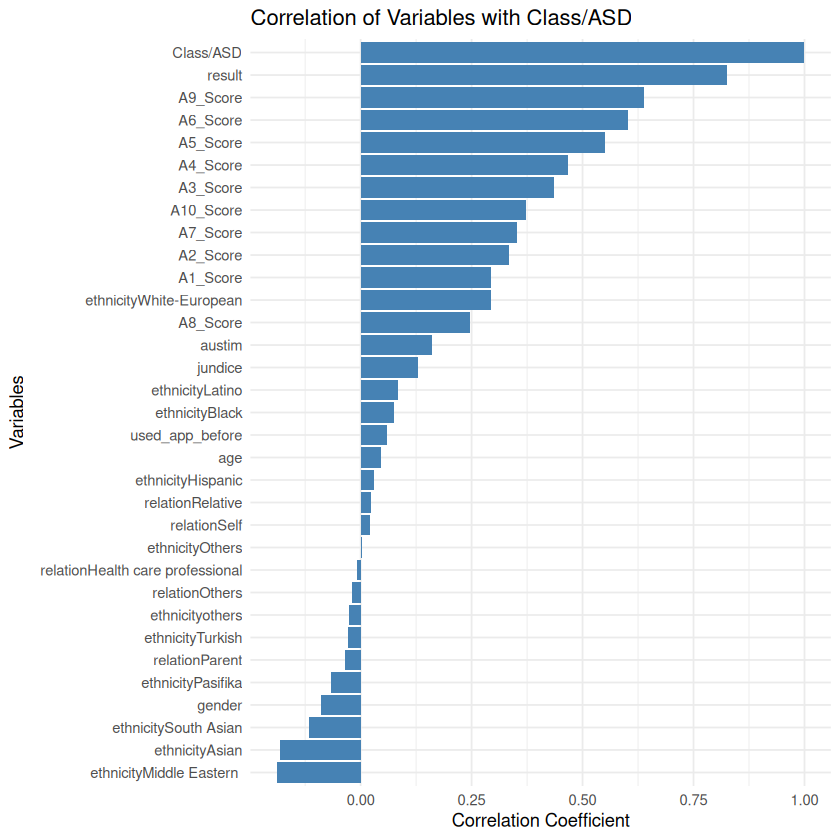

In [3]:
# Compute the correlation matrix => cor computes the correlation matrix for all numeric columns.
cor_matrix <- cor(data[sapply(data, is.numeric)]) # sapply filters only numeric columns.

# Get correlations with the target variable 'Class/ASD'
cor_with_target <- cor_matrix[, "Class/ASD"]

# Create a data frame for plotting
cor_data_frame <- data.frame(Variable = names(cor_with_target), Correlation = cor_with_target)

# Create the bar plot
ggplot(cor_data_frame, aes(x = reorder(Variable, Correlation), y = Correlation)) +
  geom_bar(stat = "identity", fill = "steelblue") +  # Bar plot
  coord_flip() +  # horizontal bar plot instead of the default vertical orientation.
  labs(title = "Correlation of Variables with Class/ASD",  x = "Variables", y = "Correlation Coefficient") +
  theme_minimal()

Display a heatmap plot for the correlation matrix between each pair of numeric columns. Examine the heatmap and focus on correlations involving the target variable (Class/ASD). Which features show strong positive or negative correlations with the target variable? What do these correlations imply in the context of the dataset? Discuss whether any pairs of features show high correlation with each other. What does a high or low correlation mean? Answer these questions at the end of the notebook.

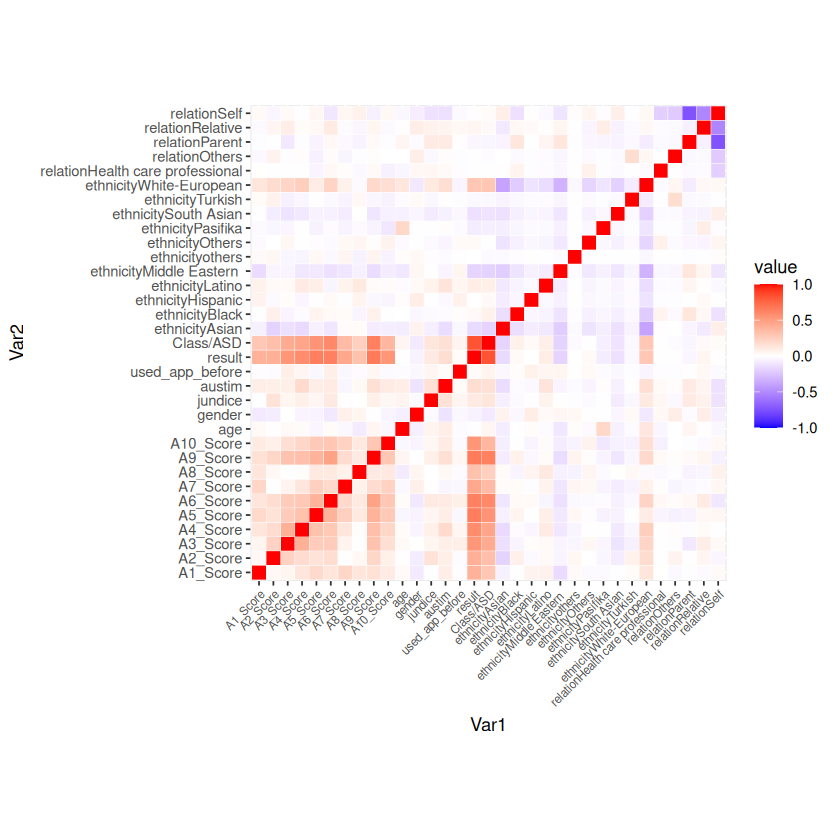

In [4]:
# Reshape the correlation matrix for plotting
melted_cor_matrix <- melt(cor_matrix)
# melt() from reshape2: transform a matrix or data frame into a long format suitable for ggplot2.

# Create the heatmap
ggplot(data = melted_cor_matrix, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile(color = "white") +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", limit = c(-1, 1)) +
  theme(axis.text.x = element_text(angle = 45, size = 7, hjust = 1)) +
  coord_fixed() # makes the heatmap square

## Describe our data by its statistics

at the first we should to get some information from our data, by using describe it

In [5]:
# summary of data for initial insights
summary(data)

    A1_Score         A2_Score         A3_Score         A4_Score     
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :1.0000   Median :0.0000   Median :0.0000   Median :1.0000  
 Mean   :0.7384   Mean   :0.4669   Mean   :0.4785   Mean   :0.5215  
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
                                                                    
    A5_Score         A6_Score         A7_Score         A8_Score     
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :1.0000   Median :0.0000   Median :0.0000   Median :1.0000  
 Mean   :0.5232   Mean   :0.3063   Mean   :0.4272   Mean   :0.6623  
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.0000  

### Now please compute the average of all columns in our dataset to gain more insight about it.

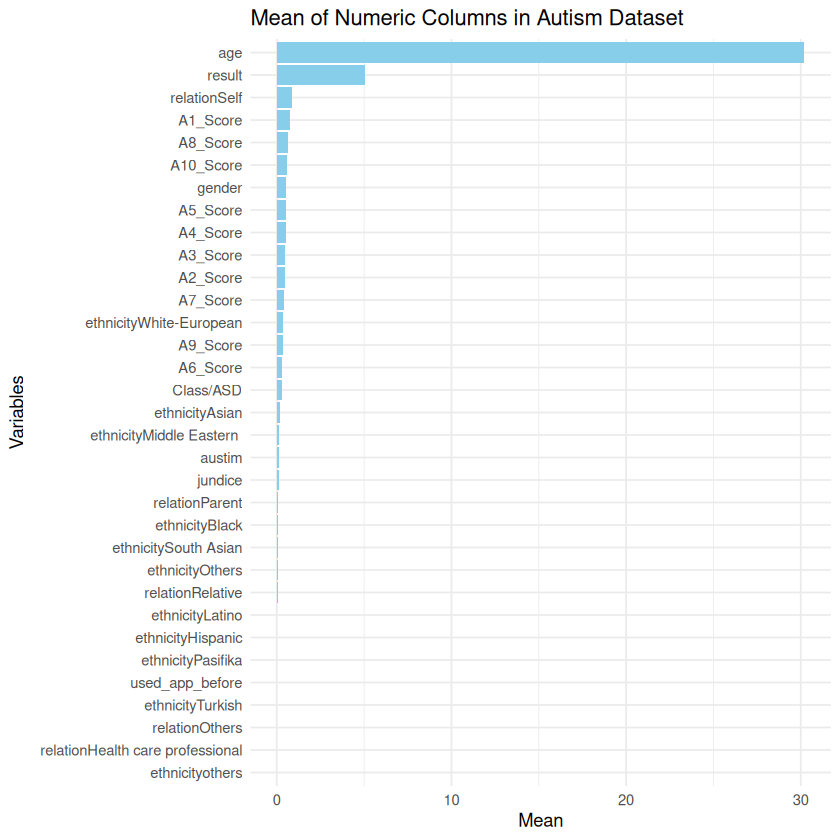

In [6]:
# Compute the means of the numeric columns
column_means <- colMeans(data[, sapply(data, is.numeric)])

# Create a data frame for plotting
mean_data_frame <- data.frame(Variable = names(column_means), Mean = column_means)

# Create a bar plot using ggplot2
ggplot(mean_data_frame, aes(x = reorder(Variable, Mean), y = Mean)) +
  geom_bar(stat = "identity", fill = "skyblue") +  
  coord_flip() +  
  theme_minimal() +
  labs(title = "Mean of Numeric Columns in Autism Dataset", x = "Variables", y = "Mean") 

## Questions

1- Please explain the advantages and disadvantages of one-hot encoding for categorical data, and also introduce another way to handle categorical features in our dataset

In [11]:
"1. Advantages:"
"The best advantage of one-hot is simplicity for machine. This way is straghtforward to implement and easy to undersatnd for both humans and machine learning models. Many machine learning algorithms work well with one-hot encoded data because it transforms categorical features into numerical format."
"In this way we can analyze data better. For example in our project we can find relation of categorical variables with target by converting them to numeric values by one-hot."
"Disadvantages:"
"One-hot encoding can significantly increase the number of features, especially when the categorical variables have many unique values. For features with a large number of categories (country or city), one-hot encoding can make the model computationally expensive, leading to bad results in some cases."
"Another way  is \"Target Encoding\" or \"Mean Encoding\":"
"Target encoding replaces each category with the mean of the target variable for that category. For example For ethnicity = \"White-European\", if 80% of the people with that ethnicity have Class/ASD = YES, \"White-European\" would be encoded as 0.80."
"This way can improve model performance especially when features have many  categories or when categories have a strong correlation with the target."
"But we have some problems in this way too. For example when we have less data, this way may lead to incorrect analysis or if not done carefully it can intorduce terget leakage where information about the target variable is used during training."

[1] "1. Advantages:"

[1] "The best advantage of one-hot is simplicity for machine. This way is straghtforward to implement and easy to undersatnd for both humans and machine learning models. Many machine learning algorithms work well with one-hot encoded data because it transforms categorical features into numerical format."

[1] "In this way we can analyze data better. For example in our project we can find relation of categorical variables with target by converting them to numeric values by one-hot."

[1] "Disadvantages:"

[1] "One-hot encoding can significantly increase the number of features, especially when the categorical variables have many unique values. For features with a large number of categories (country or city), one-hot encoding can make the model computationally expensive, leading to bad results in some cases."

[1] "Another way  is \"Target Encoding\" or \"Mean Encoding\":"

[1] "Target encoding replaces each category with the mean of the target variable for that category. For example For ethnicity = \"White-European\", if 80% of the people with that ethnicity have Class/ASD = YES, \"White-European\" would be encoded as 0.80."

[1] "This way can improve model performance especially when features have many  categories or when categories have a strong correlation with the target."

[1] "But we have some problems in this way too. For example when we have less data, this way may lead to incorrect analysis or if not done carefully it can intorduce terget leakage where information about the target variable is used during training."

2- Answer the question from the correlation compution section.

In [13]:
"2. Red colors in heatmap show strong correlation between values. As we see in plot, same values in y and x axises have most correlation with each other. We know that this is because correlation of X and X is one based on formuls we have for cor."
"The blue squares shows that we have negative correlation which indicates that values have correlation, but in negative side.  White colors show independency between values."  
"So the heat map shows same results as previous bar plot. About correlation of values with target variables, we see that for example result has more correlatin with Class/ASD and some thing like ethnicityOthers variable has less correlation."
"About other variables we see more correlatin between A_Score values." 
"A question which asked is what is correlation. As we learn in class, we know that more correlation between variables is number between -1 and 1 which shows dependency between them and correlation of independent variables is zero."

[1] "2. Red colors in heatmap show strong correlation between values. As we see in plot, same values in y and x axises have most correlation with each other. We know that this is because correlation of X and X is one based on formuls we have for cor."

[1] "The blue squares shows that we have negative correlation which indicates that values have correlation, but in negative side.  White colors show independency between values."

[1] "So the heat map shows same results as previous bar plot. About correlation of values with target variables, we see that for example result has more correlatin with Class/ASD and some thing like ethnicityOthers variable has less correlation."

[1] "About other variables we see more correlatin between A_Score values."

[1] "A question which asked is what is correlation. As we learn in class, we know that more correlation between variables is number between -1 and 1 which shows dependency between them and correlation of independent variables is zero."

In [14]:
"At first I wrote answers in Markdown mode, but after upload I understand that I don't see answers! so I convert them to code mode..."

[1] "At first I wrote answers in Markdown mode, but after upload I understand that I don't see answers! so I convert them to code mode..."